## pandas date functions and properties

In [1]:
import pandas as pd

In [2]:
orders = pd.read_excel("sales.xls")

In [3]:
orders.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [5]:
orders.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

As we can say we have proper date formats here in date columns

In [6]:
orders["Order Date"].dt.dayofyear.head()

0    286
1    275
2    275
3    191
4    240
Name: Order Date, dtype: int64

In [7]:
orders["Order Date"].dt.weekday_name.head()

0    Wednesday
1       Monday
2       Monday
3       Sunday
4     Saturday
Name: Order Date, dtype: object

In [8]:
orders["Order Date"].dt.weekofyear.head()

0    41
1    40
2    40
3    27
4    34
Name: Order Date, dtype: int64

In [9]:
orders["Order Date"].dt.dayofweek.head() #0 is monday 

0    2
1    0
2    0
3    6
4    5
Name: Order Date, dtype: int64

In [11]:
orders["year"] = orders["Order Date"].dt.year
orders["year"].value_counts()

2009    2153
2010    2142
2012    2102
2011    2002
Name: year, dtype: int64

In [16]:
orders["month"] = orders["Order Date"].dt.month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## How to identify and remove duplicate values

In [17]:
import pandas as pd

In [20]:
orders = pd.read_excel("sales.xls")
orders.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [21]:
orders.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8369    False
8370    False
8371    False
8372    False
8373    False
8374    False
8375    False
8376    False
8377    False
8378    False
8379    False
8380    False
8381    False
8382    False
8383    False
8384    False
8385    False
8386    False
8387    False
8388    False
8389    False
8390    False
8391    False
8392    False
8393    False
8394    False
8395    False
8396    False
8397    False
8398    False
Length: 8399, dtype: bool

In [22]:
orders.duplicated().sum()

0

In [23]:
orders["Customer Name"].duplicated().sum()

7604

In [24]:
orders["Customer Name"].shape

(8399,)

In [26]:
orders["Customer Name"].drop_duplicates().shape

(795,)

## Aligning two different series and data frame

In [27]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [30]:
ser1 = Series([0,1,2,3,4,5],index=['A','B','C','E','F','G'])
ser1

A    0
B    1
C    2
E    3
F    4
G    5
dtype: int64

In [33]:
ser2 = Series([1,3,5,7,9,11],index = ['A','B','D','F','H','I'])
ser2

A     1
B     3
D     5
F     7
H     9
I    11
dtype: int64

In [34]:
ser1 + ser2

A     1.0
B     4.0
C     NaN
D     NaN
E     NaN
F    11.0
G     NaN
H     NaN
I     NaN
dtype: float64

In [44]:
df1 = DataFrame(np.arange(4).reshape(2,2),columns=list('AB'),index=['Prod1','Prod2'])
df1

,A,B
Prod1,0,1
Prod2,2,3


In [49]:
df2 = DataFrame(np.arange(9).reshape(3,3),columns=list('ADC'),index=['Prod1','Prod3','Prod5'])
df2

,A,D,C
Prod1,0,1,2
Prod3,3,4,5
Prod5,6,7,8


In [50]:
df1 + df2

,A,B,C,D
Prod1,0.0,NaN,NaN,NaN
Prod2,NaN,NaN,NaN,NaN
Prod3,NaN,NaN,NaN,NaN
Prod5,NaN,NaN,NaN,NaN


## How to rank dataframe

In [51]:
import pandas as pd

In [53]:
orders = pd.read_excel("sales.xls",0)

In [54]:
orders.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [55]:
orders.rank().head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1.0,1.0,3801.5,4236.5,954.5,3261.0,3491.5,5264.5,1009.0,5098.0,...,5854.0,4087.0,1514.0,7578.5,4029.5,6882.5,2725.0,1359.5,8063.5,3825.5
1,49.0,49.5,7916.5,2492.5,8149.5,8114.0,5751.5,573.5,7134.0,7624.5,...,704.5,4087.0,1514.0,825.0,4029.5,217.5,89.0,844.5,5760.0,7907.0
2,50.0,49.5,7916.5,2492.5,4429.5,3129.0,1159.5,5264.5,5438.0,2746.5,...,704.5,4087.0,1514.0,825.0,4029.5,892.0,2283.5,4102.0,2570.5,7913.5
3,80.0,80.0,5345.5,2492.5,4920.0,7568.0,6489.0,5264.5,7845.0,7479.0,...,1785.0,4087.0,1514.0,3187.5,7367.0,7958.0,5906.0,4102.0,5760.0,5345.5
4,85.0,85.5,3501.5,7563.5,3063.0,4008.0,6489.0,5264.5,5152.0,4275.5,...,1366.0,4087.0,1514.0,825.0,4029.5,217.5,3949.5,1745.5,3975.0,3500.0


In [57]:
orders['Rank_by_Profit']= orders['Profit'].rank(ascending=False)

In [58]:
orders.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Rank_by_Profit
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,7391.0
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,1266.0
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,2962.0
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,555.0
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,3248.0


In [59]:
orders.sort_values('Profit',ascending=False).head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Rank_by_Profit
4674,4190,29766,2009-03-21,Medium,13,89061.05,0.00,Regular Air,27220.69,6783.02,...,New Brunswick,Atlantic,Consumer,Technology,Office Machines,Polycom ViewStation™ ISDN Videoconferencing Unit,Large Box,0.39,2009-03-22,1.0
5609,1316,9637,2009-01-03,Low,49,28359.40,0.05,Regular Air,14440.39,574.74,...,Saskachewan,Prarie,Corporate,Technology,Office Machines,Polycom ViaVideo™ Desktop Video Communications...,Large Box,0.37,2009-01-10,2.0
4767,2909,20967,2011-03-15,High,50,28664.52,0.09,Regular Air,13340.26,599.99,...,Manitoba,Prarie,Small Business,Technology,Copiers and Fax,Hewlett Packard LaserJet 3310 Copier,Large Box,0.37,2011-03-15,3.0
6995,4629,32932,2010-01-09,Low,49,29884.60,0.05,Regular Air,12748.86,599.99,...,British Columbia,West,Corporate,Technology,Copiers and Fax,Canon Image Class D660 Copier,Large Box,0.44,2010-01-13,4.0
7906,4096,29187,2009-07-31,Low,35,26095.13,0.03,Delivery Truck,12606.81,808.49,...,Alberta,West,Consumer,Technology,Office Machines,"Hewlett-Packard Business Color Inkjet 3000 [N,...",Jumbo Drum,0.40,2009-08-07,5.0


## working with index hierarchies

In [60]:
import pandas as pd

In [62]:
ser1 = pd.Series([1,2,3,4,5,6],index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])
ser1

1  a    1
   b    2
   c    3
2  a    4
   b    5
   c    6
dtype: int64

In [64]:
ser1.index.names = ['indx_0','indx_1']
ser1

indx_0  indx_1
1       a         1
        b         2
        c         3
2       a         4
        b         5
        c         6
dtype: int64

## How to iterate over items in pandas

In [1]:
import pandas as pd

In [4]:
data = pd.read_excel("sales.xls")
data.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [8]:
for key, value in data.iteritems():
    print("{} , {} ".format(key,value[1]))

Row ID , 49 
Order ID , 293 
Order Date , 2012-10-01 00:00:00 
Order Priority , High 
Order Quantity , 49 
Sales , 10123.02 
Discount , 0.07 
Ship Mode , Delivery Truck 
Profit , 457.81 
Unit Price , 208.16 
Shipping Cost , 68.02 
Customer Name , Barry French 
Province , Nunavut 
Region , Nunavut 
Customer Segment , Consumer 
Product Category , Office Supplies 
Product Sub-Category , Appliances 
Product Name , 1.7 Cubic Foot Compact "Cube" Office Refrigerators 
Product Container , Jumbo Drum 
Product Base Margin , 0.58 
Ship Date , 2012-10-02 00:00:00 


## Manipulating columns name in pandas

In [9]:
import pandas as pd

In [10]:
data = pd.read_excel("sales.xls")
data.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [12]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [13]:
data.columns = [x.replace(" ","_") for x in data.columns]

In [14]:
data.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Order_Priority', 'Order_Quantity',
       'Sales', 'Discount', 'Ship_Mode', 'Profit', 'Unit_Price',
       'Shipping_Cost', 'Customer_Name', 'Province', 'Region',
       'Customer_Segment', 'Product_Category', 'Product_Sub-Category',
       'Product_Name', 'Product_Container', 'Product_Base_Margin',
       'Ship_Date'],
      dtype='object')

In [15]:
data.head(2)

,Row_ID,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Discount,Ship_Mode,Profit,Unit_Price,...,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Product_Base_Margin,Ship_Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [3]:
import pandas as pd
import json

In [12]:
json_data = """
{"country":"India",
"products":["Home appliance","Grocery","Travel sevices"],
"contact": null,
"location": "Ahemdabad",
"payment": [{"online":"credit card/ net banking"}]}"""

In [13]:
some_data = json.loads(json_data)

In [14]:
some_data

{'country': 'India',
 'products': ['Home appliance', 'Grocery', 'Travel sevices'],
 'contact': None,
 'location': 'Ahemdabad',
 'payment': [{'online': 'credit card/ net banking'}]}

In [15]:
some_data["payment"]

[{'online': 'credit card/ net banking'}]

In [16]:
json_df = pd.DataFrame(some_data["products"])

In [21]:
json_df[0][1] #it makes 2d matrix DataFrame

'Grocery'

In [22]:
json_df

,0
0,Home appliance
1,Grocery
2,Travel sevices


In [23]:
bob = {'name':"BoB",'age':14,"isEmployed":True}

In [24]:
bob_json = json.dumps(bob)

In [25]:
bob_json

'{"name": "BoB", "age": 14, "isEmployed": true}'

## How to filter the dataframe with the specific values in the column

In [26]:
import pandas as pd

In [28]:
data = pd.read_excel("sales.xls")

In [29]:
data.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [30]:
data.drop(["Row ID","Order ID"],axis = 1,inplace=True)

In [31]:
data.head(2)

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [34]:
data.columns = [x.replace(" ","_").lower() for x in data.columns]

In [35]:
data.head(2)

,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,shipping_cost,customer_name,province,region,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date
0,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [36]:
data.ship_mode.unique()

array(['Regular Air', 'Delivery Truck', 'Express Air'], dtype=object)

In [37]:
data["ship_mode"] = data["ship_mode"].str.lower()

In [39]:
data.ship_mode.iloc[:5]

0       regular air
1    delivery truck
2       regular air
3       regular air
4       regular air
Name: ship_mode, dtype: object

In [40]:
data.ship_mode.unique()

array(['regular air', 'delivery truck', 'express air'], dtype=object)

In [41]:
data_subset = ['regular air', 'delivery truck']

In [43]:
data_sv = data[data.ship_mode.isin(data_subset)]

In [44]:
data_sv.head()

,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,shipping_cost,customer_name,province,region,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date
0,2010-10-13,Low,6,261.5400,0.04,regular air,-213.2500,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,2012-10-01,High,49,10123.0200,0.07,delivery truck,457.8100,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,2012-10-01,High,27,244.5700,0.01,regular air,46.7075,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,2011-07-10,High,30,4965.7595,0.08,regular air,1198.9710,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,2010-08-28,Not Specified,19,394.2700,0.08,regular air,30.9400,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


## How to reshape data in pandas

In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_excel("sales.xls")

In [47]:
data.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [49]:
data_reshape = pd.pivot_table(data,values='Profit',index=['Ship Mode','Order Priority'],aggfunc=np.mean)

In [50]:
data_reshape

Profit
Ship Mode      Order Priority            
Delivery Truck Critical        -73.824920
               High            315.671050
               Low             392.664608
               Medium          318.944292
               Not Specified   207.631473
Express Air    Critical        171.315872
               High            190.857634
               Low             139.412907
               Medium          165.501862
               Not Specified    71.949825
Regular Air    Critical        140.208253
               High            220.429223
               Low             204.320495
               Medium          186.450812
               Not Specified   126.071412

## How to create Dateframe from dictionary

In [51]:
product_sales = {"Products":['a','b','c','d','e','f'],
                  "sales": [1,2,3,4,5,6]}

In [52]:
product_sales

{'Products': ['a', 'b', 'c', 'd', 'e', 'f'], 'sales': [1, 2, 3, 4, 5, 6]}

In [53]:
import pandas as pd

In [54]:
prod_sales_df = pd.DataFrame(product_sales)

In [55]:
prod_sales_df

,Products,sales
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6


## How to format date time in pandas

In [56]:
import pandas as pd

In [57]:
dates = ['1999-10-09','sep 10, 1999','10/09/1999','1999.10.09','1999/09/10','19991009']

In [58]:
dates

['1999-10-09',
 'sep 10, 1999',
 '10/09/1999',
 '1999.10.09',
 '1999/09/10',
 '19991009']

In [59]:
pd.to_datetime(dates)

DatetimeIndex(['1999-10-09', '1999-09-10', '1999-10-09', '1999-10-09',
               '1999-09-10', '1999-10-09'],
              dtype='datetime64[ns]', freq=None)

## Data Analysis using pandas

Scatter Plot matrix

In [60]:
import pandas as pd
%matplotlib inline

In [62]:
orders = pd.read_excel("sales.xls",0)

In [63]:
orders.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [71]:
pd.set_option("display.max_columns",None)

In [72]:
orders.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022721A93B38>,
      dtype=object)

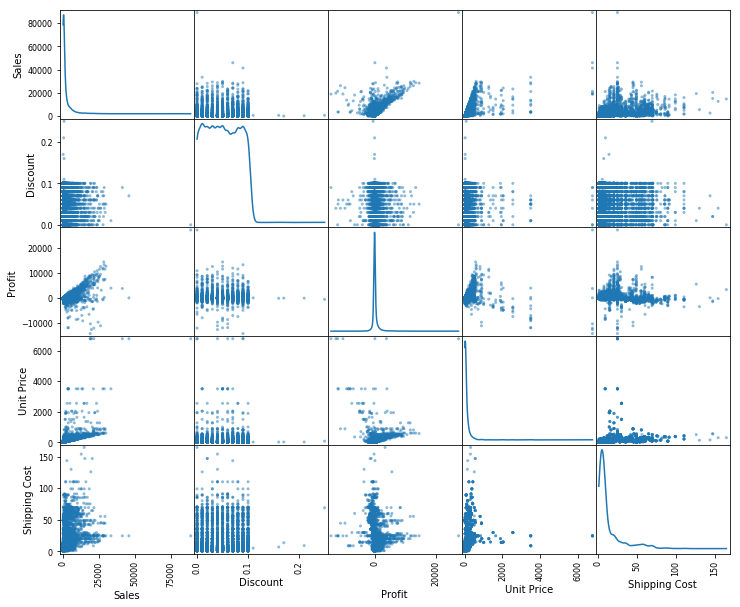

In [73]:
pd.scatter_matrix(orders.loc[:,'Sales':'Shipping Cost'],figsize= (12,10),diagonal="kde")

In [74]:
import pandas as pd

In [75]:
from sklearn.datasets import load_boston

In [76]:
boston = load_boston()

In [77]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [78]:
boston_df = pd.DataFrame(boston.data)

In [79]:
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [83]:
boston_df.columns = boston.feature_names

In [84]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [86]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
